<a href="https://colab.research.google.com/github/faan03/BC_CE_DataAnalysis/blob/main/BC_CE_DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carga de Datos  librerias

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

#urlData ="https://www.dropbox.com/s/2vivxom9cw8ngnm/Bitcoin_todasColumnas.csv?dl=1" # bitcoin todas las columnas
#urlData = "https://www.dropbox.com/s/3j0i3i6oqx21sef/bitcoin_solo_Col_Numero_mineros_Fechas.csv?dl=1" # bitcoin solo columnas, numero, minero y fechas 
#urlData = "https://www.dropbox.com/s/qeym09b5qvt9s3k/bitcoinAjusteDesconocidoTodasColumnas.csv?dl=1" #bitcoin todas las columnas,ajuste desconocido
#urlData = "https://www.dropbox.com/s/hu6zc1tcjb81dry/bitcoin_AjusteDesconocido_solo_Col_Numero_mineros_Fechas.csv?dl=1" #bitcoin solo columnas, numero, minero y fechas , ajuste desconocido - ok
#urlData = "https://www.dropbox.com/s/hsd7z7gicoizi3s/ethereum_con%20Fechas.csv?dl=1" # - crypto_ethereum - ok
urlData = "https://www.dropbox.com/s/ud656h6dvsmozxh/crypto_ethereum_solo_Col_Numero_mineros_Fechas.csv?dl=1"  #- ok, leerte este!!!


dfData = pd.read_csv(urlData,sep=',')#, thousands='.')#, decimal=',') 
dfData= dfData.sort_values(by=['Height']) # Luego de cargar datos, se ordenan por peso/numero del bloque es decir del mas antiguo a mas nuevo

#from google.colab import drive
#drive.mount('/content/gdrive')

#necesario para confirmaciones - bitcoin

 #columnas = ['Number of Transactions', 'Confirmations', 'Difficulty','Size']
 #dfData[columnas] = dfData[columnas].replace({',':''}, regex=True)
 #dfData['Size'] = dfData['Size'].replace({'bytes':''}, regex=True)
 #dfData[['Block Reward',	'Fee Reward']] = dfData[['Block Reward', 'Fee Reward']].replace({'BTC':''}, regex=True)
 #dfData[['Number of Transactions','Difficulty','Size','Block Reward','Fee Reward','Confirmations']]= dfData[['Number of Transactions','Difficulty','Size','Block Reward','Fee Reward','Confirmations']].astype(float)



In [ ]:
dfData

,Height,Miner Name,Date,Year,Year_Month
1667857,0,0x0000000000000000000000000000000000000000,1970-01-01,1970,1970-01
1306480,1,0x05a56e2d52c817161883f50c441c3228cfe54d9f,2015-07-30,2015,2015-07
2812369,2,0xdd2f1e6e498202e86d8f5442af596580a4f03c2c,2015-07-30,2015,2015-07
3566437,3,0x5088d623ba0fcf0131e0897a91734a4d83596aa0,2015-07-30,2015,2015-07
2812612,4,0xc8ebccc5f5689fa8659d83713341e5ad19349448,2015-07-30,2015,2015-07
...,...,...,...,...,...
1189036,12322987,0x00192fb10df37c9fb26829eb2cc623cd1bf599e8,2021-04-27,2021,2021-04
10893231,12322988,0x99c85bb64564d9ef9a99621301f22c9993cb89e3,2021-04-27,2021,2021-04
3812771,12322989,0x52bc44d5378309ee2abf1539bf71de1b7d7be3b5,2021-04-27,2021,2021-04
2318237,12322990,0x45a36a8e118c37e4c47ef4ab827a7c9e579e11e2,2021-04-27,2021,2021-04


In [ ]:
#gConfirmations



#g =dfUnknown.groupby([ 'Year', 'Miner Name'] )['Miner Name'].unique().rename('n').reset_index() #.to_frame().reset_index() #['Year','Miner Name']#['Miner Name'].unique().count()
#print("Mineros desconocidos individualizados por año")
#r=g.groupby(['Year'])['Year'].count().rename('Mineros Desconocidos').reset_index()

In [ ]:
d= dfYears[ dfYears['Year_Month']=='2020-01' ]
d= d[d['Miner Name']=='BTC.TOP' ]
d['Number of Transactions'].max()

#print(dfYears.dtypes)
#dfYears= dfYears.infer_objects()
#print(dfYears.dtypes)


NameError: ignored

In [ ]:
#para ethereum
#dfData = 
dfData.drop(dfData.index[:1], inplace=True)
print(dfData.dtypes)
print(dfData.shape)
#d= dfData[dfData['Miner Name'] == 'AntPool']

#p = (len(d)/len(dfData))*100 # AntPool 7.9
#print(f"{p} % ")
#print(len(d))
print(len(dfData))

#print(dfData.head(5))
print(dfData.tail()['Date'])# head(5))
print(dfData.head()['Date'])# head(5))
'''
7.953113922270594 % 
54294
682676
'''

In [ ]:
print(dfData.head(5))
print(len(dfData))
print(dfData.tail(5))
dfData

# Funciones

In [ ]:
def filterDates (dfData,start_date , end_date ):
    after_start_date = dfData["Date"] >= start_date
    before_end_date = dfData["Date"] <= end_date
    between_two_dates = after_start_date & before_end_date
    return dfData[between_two_dates]

def getListlMinersBlocks(dfData,start_date ='none', end_date ='none'):
    if start_date != 'none':
        filtered_df = filterDates (dfData,start_date, end_date)
    else:
        filtered_df = dfData
    lMinersBlocks = filtered_df['Miner Name']
    lMinersBlocks = list(lMinersBlocks)
    lMinersBlocks.append('*')
    return lMinersBlocks

def getSequenceDictionary(BC):
    D=dict()
    ultimo=BC[0]
    secuencia=1
    for k in range(1,len(BC)):
        minero=BC[k]
        if minero!=ultimo:
            if not (ultimo in D.keys()):
                L=[secuencia-i+1 for i in range(1,secuencia+1)]
                D[ultimo]=L
            else: 
                L=D[ultimo]
                if len(L)<secuencia:
                    for i in range(len(L), secuencia):
                        L.append(0)

                for i in range(1, secuencia+1):
                    L[i-1]=L[i-1]+secuencia-i+1
          
                D[ultimo]=L
            secuencia=1
            ultimo=minero
        else:
            secuencia=secuencia+1   
    return D   

def showSequences(D,nBlocks):
    largestS =0
   # print("\n===========================================================================================")               
    #print("Minero      |# Bloques Minados en secuencia | % Bloques Minados en secuencia \n")
    for  d in D.keys():
        if largestS< len(D[d]):
            largestS=len(D[d])
        v=np.array(D[d])
        ##print(d,"    ",v,"   ", v/nBlocks)  # que probabilidad se quiere mostrar? - para ver detalle
    return largestS    

def showPercentageMinedSequence(largestS, nBlocks, D):
    print("\n===========================================================================================")               
    print("# bloques Minados consecutivamente | % minado \n")
    arraySequences=np.array([0]*largestS)
    for  d in D.keys():
        v=D[d]
        v=v+[0]*(largestS-len(v))
        arraySequences=arraySequences+np.array(v)
    arraySequences=arraySequences/nBlocks 

    for k in range(len(arraySequences)):
        #print(k+1," | " ,arraySequences[k] )
        print(k+1, ' |' ,'{:,.15f}'.format(arraySequences[k]).replace(".", ","))        

def getColumns (dfData, columns):
    return dfData.loc[:, columns] 

def numberBlocksAndMinersbyYear(dfData):
    print("Numero Bloques en todo el periodo : ", len(dfData) )
    print("Numero Mineros todo el periodo : ", len(dfData['Miner Name'].unique()) )
    print("============Bloques, mineros por año ================================================================================")    
    print(f"Año\tBlocks\tMiners")
    for a  in range(dfData['Year'].min(),dfData['Year'].max()+1):
        dfYear=dfData[dfData['Year']==a]
        nBlocks=len(dfYear)
        nMiners=len(dfYear['Miner Name'].unique()) 
        print(f"{a}\t{nBlocks}\t{nMiners}")

def sequenceMiningPercentagebyYear(dfData):
    print("============Porcentaje de minado de k bloques  en secuencia por año ================================================================================")    
    for a  in range(dfData['Year'].min(),dfData['Year'].max()+1):
        print(f"\n=================================== Año  {a} ===============================")
        dfYear=dfData[dfData['Year']==a]
        BC=getListlMinersBlocks(dfYear)
        nBlocks=len(dfYear)
        D=getSequenceDictionary(BC)
        largestS = showSequences(D, nBlocks)
        showPercentageMinedSequence(largestS, nBlocks, D)            

def largestSequencebyYear(dfData):
    print("============ tañamo Secuencia mas larga de k bloques  minados consecutivamente por año ================================================================================")    
    print(f"Año\t tamaño secuencia mas larga")    
    for a  in range(dfData['Year'].min(),dfData['Year'].max()+1):
        dfYear=dfData[dfData['Year']==a]
        BC=getListlMinersBlocks(dfYear)
        nBlocks=len(dfYear)
        D=getSequenceDictionary(BC)
        largestS = showSequences(D, nBlocks)
        print(f"{a}\t{largestS}")        

def allBlocksAndMiners_AndsequenceMiningPercentage(dfData):
    BC=getListlMinersBlocks(dfData)
    nBlocks=len(dfData) 
    D=getSequenceDictionary(BC)
    #print ("Se registran ", len(D), "Mineros en todo el periodo") ## OJO ACA
    largestS = showSequences(D, nBlocks)
    showPercentageMinedSequence(largestS, nBlocks, D)

def graphHashrateDistributionOverTime(dfData,uT,title,sDate='All',eDate='All',mNames=[],minHrT=0):  # Date, Year,Year_month 
    if eDate=='All':
        df=dfData
    else:            
        df = filterDates (dfData,sDate,eDate)
  # print(df)    
    df=df[['Miner Name',uT]]
    g= df.groupby([uT,'Miner Name'])['Miner Name'].count()     
    df1= g.to_frame().rename(columns={'Miner Name':'Cantidad'}).reset_index()
    df2= df.groupby([uT]).count().rename(columns={'Miner Name':'total'}).reset_index()
    r=pd.merge(df1, df2, on=uT, how='inner')    
    r['Hashrate']=r['Cantidad']/r['total']          
    listBestMiners=df.groupby(['Miner Name'])['Miner Name'].count().to_frame().rename(columns={'Miner Name':'Cantidad'}).reset_index().sort_values(by=['Cantidad'],ascending=False)
    s=listBestMiners['Cantidad'].sum()
    listBestMiners['hrT']=(listBestMiners['Cantidad']/s)*100    
    listBestMiners= listBestMiners[listBestMiners['hrT']>=minHrT]
    pHashratecovered= listBestMiners['hrT'].sum()
    r=r[r['Miner Name'].isin(listBestMiners['Miner Name'])]
    if len(mNames)>0:
        r= r[r['Miner Name'].isin(mNames)]
    #pHashratecovered= r['hrT'].sum()          
    ##------------------- 
    sns.set(style="whitegrid",font='Times New Roman', font_scale=1)     
    #sns.set_theme(style="darkgrid")

    plt.figure( figsize=(25,15))
    plt.suptitle(title , fontsize=16)       
    #fig, ax = plt.subplots()
    #ax.xaxis.set_major_locator(ticker.MultipleLocator(1))    
    sns.lineplot(data=r, x= uT, y="Hashrate", hue="Miner Name", palette='bright')
    #sns.displot(data=r, x=uT, hue="Miner Name", kind="kde", height=6, multiple="fill", clip=(0, None),  palette='Spectral')
    #plt.savefig("/content/drive/MyDrive/BC_images/"+title.replace(' ','')+".png", dpi=300,bbox_inches ="tight",  pad_inches = .7)   
    plt.savefig(title.replace(' ','')+".png", dpi=300,bbox_inches ="tight",  pad_inches = .7)   
    #return (pHashratecovered,len(listBestMiners))
    #return r
    return r

def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = '{:.2f} %'.format(float(p.get_width()))
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)


def graphHashrateDistribution(dfData,title,mNames=[],sDate='All',eDate='All',minHrT=0 ):    
    if eDate=='All':
        df=dfData
    else:            
        df = filterDates (dfData,sDate,eDate)
    listBestMiners=df.groupby(['Miner Name'])['Miner Name'].count().to_frame().rename(columns={'Miner Name':'Cantidad'}).reset_index().sort_values(by=['Cantidad'],ascending=False)
    s=listBestMiners['Cantidad'].sum()
    listBestMiners['Hashrate']=(listBestMiners['Cantidad']/s)*100
    listBestMiners= listBestMiners[listBestMiners['Hashrate']>=minHrT]
    r=listBestMiners[['Miner Name','Hashrate']]
    if len(mNames)>0:
        r= r[r['Miner Name'].isin(mNames)]      
    pHashratecovered= r['Hashrate'].sum()
    
    ##-------------------    
    sns.set(style="whitegrid",font='Times New Roman')
    plt.figure( figsize=(10,7.5))
    #plt.suptitle('Hashrate Distribution from ' + df['Date'].min() +"  to " +df['Date'].max() , fontsize=16)    
    plt.suptitle(title , fontsize=16)    
    graph = sns.barplot(x='Hashrate', y="Miner Name", data = r ,  palette='Spectral')
    show_values_on_bars(graph, "h", 0.3)
    ##plt.savefig("/content/drive/MyDrive/BC_images/"+title.replace(' ','')+".png", dpi=300,bbox_inches ="tight",  pad_inches = .7)
    plt.savefig(title.replace(' ','')+".png", dpi=300,bbox_inches ="tight",  pad_inches = .7)
    #return (pHashratecovered,len(r))
    return r

def UnknownMinersByYear(dfData):
    dfUnknown=dfData[dfData['Miner Name'].str.slice(stop=7) == 'Unknown']
    g =dfUnknown.groupby([ 'Year', 'Miner Name'] )['Miner Name'].unique().rename('n').reset_index() #.to_frame().reset_index() #['Year','Miner Name']#['Miner Name'].unique().count()
    print("Mineros desconocidos individualizados por año")
    r=g.groupby(['Year'])['Year'].count().rename('Mineros Desconocidos').reset_index()
    print(r)
   

# Main Cadenas de minado

In [ ]:
##cantidad de mineros y bloques en todo el periodo, ademas de % minado de secuencia de k bloques



allBlocksAndMiners_AndsequenceMiningPercentage(dfData)        

##cantidad de mineros y bloques por año, ademas de % minado de secuencia de k bloques

#numberBlocksAndMinersbyYear(dfData)

sequenceMiningPercentagebyYear(dfData)

#largestSequencebyYear(dfData)

#Mineros desconocidos por año
#UnknownMinersByYear(dfData)

#dfUnknown=dfData[ dfData['Miner Name'].str.slice(stop=7) == 'Unknown']

##mineros por año


#gm =dfData.groupby([ 'Year', 'Miner Name'] )['Miner Name'].unique().rename('n').reset_index() #.to_frame().reset_index() #['Year','Miner Name']#['Miner Name'].unique().count()
#rm=gm.groupby(['Year'])['Year'].count().rename('Mineros').reset_index()
#print(rm)

#print(len(dfData['Miner Name'].unique()))

'''
gb =dfData.groupby([ 'Year', 'Height'] )['Height'].unique().rename('n').reset_index() #.to_frame().reset_index() #['Year','Miner Name']#['Miner Name'].unique().count()
rb=gb.groupby(['Year'])['Year'].count().rename('Bloques').reset_index()

r=pd.merge(gb, gm, on='Year', how='inner')    
r
'''


'''
for y in range(2009,2022):
    d = dfData[dfData["Year"]==y]
    li= d["Miner Name"].unique()
    c=0
    t=0
    for l in li:
        if "Unknown" in  l:
            ##print(l)
            c=c+1    
        else:
            t=t+1    
    print( len(li)," -  ", c,"  - ", t)
'''
#d = dfData[dfData["Year"]=='2009']
#li= d["Miner Name"].unique()
#print(dfData['Year']==2009)


#print(dfData.dtypes)
#dfData.head()


# Main Grafica de minado

,Miner Name,Hashrate
350,0x5a0b54d5dc17e0aadc383d2db43b0a0d3e029c4c,26.645586
899,0xea674fdde714fd979de3edf0f56aa9716b898ec8,22.774937
491,0x829bd824b016326a401d083b33d092293333a830,10.620453
323,0x52bc44d5378309ee2abf1539bf71de1b7d7be3b5,8.021593
30,0x04668ec2f57cc15c381b461b9fedab5d451c8f7f,5.005327
813,0xd224ca0c819e8e97ba0136b3b95ceff503b79f53,2.192833
571,0x99c85bb64564d9ef9a99621301f22c9993cb89e3,1.220630
3,0x005e288d713a5fb3d7c9cf1b43810a98688c7223,1.109614


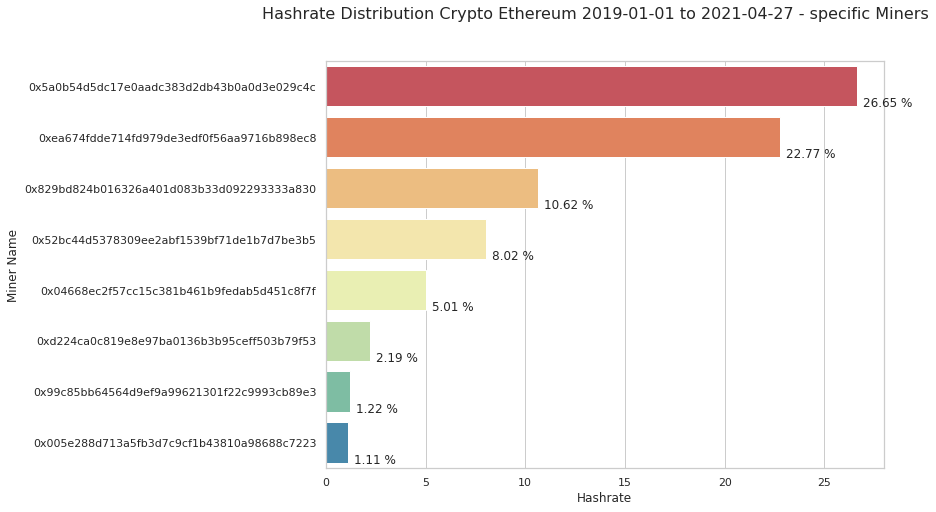

In [ ]:
# crypto_ethereum

#pHashratecovered= graphHashrateDistribution(dfData,"Hashrate Distribution Hashrate Distribution Crypto Ethereum  All Period - Min HashRate:1%",minHrT=1) # all period

#pHashratecovered=graphHashrateDistribution(dfData,f"Hashrate Distribution Crypto Ethereum 2019-01-01 to 2021-05-08 Min HashRate:2% ",sDate="2019-01-01",eDate="2021-05-08", minHrT=2)

##--- OJO aca

#miners = ['0x5a0b54d5dc17e0aadc383d2db43b0a0d3e029c4c', '0xea674fdde714fd979de3edf0f56aa9716b898ec8' , '0x829bd824b016326a401d083b33d092293333a830', '0x52bc44d5378309ee2abf1539bf71de1b7d7be3b5', '0x04668ec2f57cc15c381b461b9fedab5d451c8f7f','0xb2930b35844a230f00e51431acae96fe543a0347', '0xd224ca0c819e8e97ba0136b3b95ceff503b79f53' , '0x4c549990a7ef3fea8784406c1eecc98bf4211fa5','0x99c85bb64564d9ef9a99621301f22c9993cb89e3', '0xb3b7874f13387d44a3398d298b075b7a3505d8d4','0x005e288d713a5fb3d7c9cf1b43810a98688c7223']
##Mines presetes en el 2021
#miners = ['0x005e288d713a5fb3d7c9cf1b43810a98688c7223','0x04668ec2f57cc15c381b461b9fedab5d451c8f7f', '0x52bc44d5378309ee2abf1539bf71de1b7d7be3b5', '0x5a0b54d5dc17e0aadc383d2db43b0a0d3e029c4c', '0x829bd824b016326a401d083b33d092293333a830','0x99c85bb64564d9ef9a99621301f22c9993cb89e3','0xd224ca0c819e8e97ba0136b3b95ceff503b79f53','0xea674fdde714fd979de3edf0f56aa9716b898ec8']
#pHashratecovered=graphHashrateDistribution(dfData,f"Hashrate Distribution Crypto Ethereum 2019-01-01 to 2021-04-27 - specific Miners",sDate="2019-01-01",eDate="2021-04-27", mNames=miners)
#pHashratecovered = graphHashrateDistributionOverTime(dfData,'Year', title=f"Hashrate Distribution Over Time - Cryto Ethereum by Day Since 2019 - specific miners",sDate="2019-01-01",eDate="2021-04-27",mNames=miners) 

#pHashratecovered=graphHashrateDistribution(dfData,f"Hashrate Distribution Crypto Ethereum 2019-01-01 to 2021-05-08 Min HashRate:2% ",sDate="2019-01-01",eDate="2021-04-27", minHrT=2)
#pHashratecovered = graphHashrateDistributionOverTime(dfData,'Year', title=f"Hashrate Distribution Over Time - Cryto Ethereum by Day Since 2019 - Min HashRate:1%",sDate="2019-01-01",eDate="2021-04-27",minHrT=1) 

#lineTimeData  = graphHashrateDistributionOverTime(dfData,'Date', title=f"Hashrate Distribution Over Time - Cryto Ethereum by Day Since 2019 - Min HashRate:2%",sDate="2019-01-01",eDate="2021-05-08",minHrT=1) 
#lineTimeData.to_csv (r'lineTimeDataCEthereum_2019_2021.csv', index = False, header=True) # otras columnas fecha

##---------------------------------------Grupos Ethereum--------------------------

#--------------- kmeans K=3 ---------
#grupo 0
#pHashratecovered  = graphHashrateDistributionOverTime(dfData,'Date', title=f"Hashrate Distribution Over Time - Ethereum by Day from 2019-01-01 to 2021-04-27 - kmeans k= 3 Group 0", sDate="2019-01-01",eDate="2021-04-27 ",mNames=['0x829bd824b016326a401d083b33d092293333a830','0x52bc44d5378309ee2abf1539bf71de1b7d7be3b5']) #desde 2019
#grupo 1
#pHashratecovered  = graphHashrateDistributionOverTime(dfData,'Date', title=f"Hashrate Distribution Over Time - Ethereum by Day from 2019-01-01 to 2021-04-27 - kmeans k= 3 Group 1", sDate="2019-01-01",eDate="2021-04-27 ",mNames=['0x5a0b54d5dc17e0aadc383d2db43b0a0d3e029c4c','0xea674fdde714fd979de3edf0f56aa9716b898ec8']) #desde 2019
#grupo 2
#pHashratecovered  = graphHashrateDistributionOverTime(dfData,'Date', title=f"Hashrate Distribution Over Time - Ethereum by Day from 2019-01-01 to 2021-04-27 - kmeans k= 3 Group 2", sDate="2019-01-01",eDate="2021-04-27 ",mNames=['0x04668ec2f57cc15c381b461b9fedab5d451c8f7f','0xb2930b35844a230f00e51431acae96fe543a0347','0xd224ca0c819e8e97ba0136b3b95ceff503b79f53','0x4c549990a7ef3fea8784406c1eecc98bf4211fa5','0x99c85bb64564d9ef9a99621301f22c9993cb89e3','0xb3b7874f13387d44a3398d298b075b7a3505d8d4','0x005e288d713a5fb3d7c9cf1b43810a98688c7223' ]) #desde 2019

#------------------ dbscan k=3

#grupo 0
#pHashratecovered  = graphHashrateDistributionOverTime(dfData,'Date', title=f"Hashrate Distribution Over Time - Ethereum by Day from 2019-01-01 to 2021-04-27 - dbscan k= 3 Group 0", sDate="2019-01-01",eDate="2021-04-27 ",mNames=['0x5a0b54d5dc17e0aadc383d2db43b0a0d3e029c4c']) #desde 2019
#grupo 1
#pHashratecovered  = graphHashrateDistributionOverTime(dfData,'Date', title=f"Hashrate Distribution Over Time - Ethereum by Day from 2019-01-01 to 2021-04-27 - dbscan k= 3 Group 1", sDate="2019-01-01",eDate="2021-04-27 ",mNames=['0xea674fdde714fd979de3edf0f56aa9716b898ec8']) #desde 2019
#grupo 2
#pHashratecovered  = graphHashrateDistributionOverTime(dfData,'Date', title=f"Hashrate Distribution Over Time - Ethereum by Day from 2019-01-01 to 2021-04-27 - dbscan k= 3 Group 2", sDate="2019-01-01",eDate="2021-04-27 ",mNames=['0x829bd824b016326a401d083b33d092293333a830','0x52bc44d5378309ee2abf1539bf71de1b7d7be3b5','0x04668ec2f57cc15c381b461b9fedab5d451c8f7f','0xb2930b35844a230f00e51431acae96fe543a0347','0xd224ca0c819e8e97ba0136b3b95ceff503b79f53','0x4c549990a7ef3fea8784406c1eecc98bf4211fa5','0x99c85bb64564d9ef9a99621301f22c9993cb89e3','0xb3b7874f13387d44a3398d298b075b7a3505d8d4','0x005e288d713a5fb3d7c9cf1b43810a98688c7223']) #desde 2019

#---------------------- Kmeans k=4 , DBScan , Birch
#grupo 0
#pHashratecovered  = graphHashrateDistributionOverTime(dfData,'Date', title=f"Hashrate Distribution Over Time - Ethereum by Day from 2019-01-01 to 2021-04-27 - dbscan k= 4 Group 0", sDate="2019-01-01",eDate="2021-04-27 ",mNames=['0x04668ec2f57cc15c381b461b9fedab5d451c8f7f','0xb2930b35844a230f00e51431acae96fe543a0347','0xd224ca0c819e8e97ba0136b3b95ceff503b79f53','0x4c549990a7ef3fea8784406c1eecc98bf4211fa5','0x99c85bb64564d9ef9a99621301f22c9993cb89e3','0xb3b7874f13387d44a3398d298b075b7a3505d8d4','0x005e288d713a5fb3d7c9cf1b43810a98688c7223']) #desde 2019

#grupo 1
#pHashratecovered  = graphHashrateDistributionOverTime(dfData,'Date', title=f"Hashrate Distribution Over Time - Ethereum by Day from 2019-01-01 to 2021-04-27 - dbscan k= 4 Group 1", sDate="2019-01-01",eDate="2021-04-27 ",mNames=['0xea674fdde714fd979de3edf0f56aa9716b898ec8']) #desde 2019
#grupo 2
#pHashratecovered  = graphHashrateDistributionOverTime(dfData,'Date', title=f"Hashrate Distribution Over Time - Ethereum by Day from 2019-01-01 to 2021-04-27 - dbscan k= 4 Group 2", sDate="2019-01-01",eDate="2021-04-27 ",mNames=['0x829bd824b016326a401d083b33d092293333a830','0x52bc44d5378309ee2abf1539bf71de1b7d7be3b5']) #desde 2019
#grupo 3
#pHashratecovered  = graphHashrateDistributionOverTime(dfData,'Date', title=f"Hashrate Distribution Over Time - Ethereum by Day from 2019-01-01 to 2021-04-27 - dbscan k= 4 Group 2", sDate="2019-01-01",eDate="2021-04-27 ",mNames=['0x5a0b54d5dc17e0aadc383d2db43b0a0d3e029c4c']) #desde 2019



#pHashratecovered=graphHashrateDistribution(dfData,f"Hashrate Distribution Crypto Ethereum 2019-01-01 to 2021-05-08 Min HashRate:1% ",sDate="2019-01-01",eDate="2021-05-08", minHrT=1)

#pHashratecovered=graphHashrateDistribution(dfData,f"Hashrate Distribution Crypto Ethereum  2017-01-01 to 2021-05-08",sDate="2017-01-01",eDate="2021-05-08", mNames=miners) # g0

#pHashratecovered=graphHashrateDistribution(dfData,f"Hashrate Distribution Crypto Ethereum  All Period", mNames=miners) # g0

#graph with ALL Unknowm
# graph Hashrate Distribution Over Time 

#pHashratecovered=graphHashrateDistribution(dfData,f"Hashrate Distribution Crypto Ethereum  2019-01-01 to 2021-04-27",sDate="2019-01-01",eDate="2021-04-27", minHrT=1) # g0
#pHashratecovered=graphHashrateDistributionOverTime(dfData,'Year', title="Hashrate Distribution Over Time - Ethereum by Year - All",minHrT=1) # todo el periodo por año
#pHashratecovered=graphHashrateDistribution(dfData,f"Hashrate Distribution Crypto Ethereum  All Period Min HashRate: 1%",minHrT=1) # g0

#graphHashrateDistributionOverTime(dfData,'Year_Month', title="Hashrate Distribution Over Time Bitcoin by Year_Month - All Period",minHrT=0.001) # todo el periodo por año
#pHashratecovered= graphHashrateDistributionOverTime(dfData,'Date', title="Hashrate Distribution Over Time - Bitcoin by Day All Period Min HashRate: 2%",minHrT=2) # todo el periodo por dia
#print(pHashratecovered)

## mes por cada año
#for y in range (2009,2022): # año por año
#    graphHashrateDistributionOverTime(dfData,'Year_Month',title= f"Hashrate Distribution Over Time - Bitcoin by Month  - {y}", sDate= str(y)+"-01-01", eDate= str(y)+"-12-31", minHrT=0.001) # año por año  -> mes

#dia por cada año
#for y in range (2009,2022): # año por año
#    graphHashrateDistributionOverTime(dfData,'Date',title= f"Hashrate Distribution Over Time - Bitcoin by Day  - {y}", sDate= str(y)+"-01-01", eDate= str(y)+"-12-31", minHrT=0.001) # año por año  -> dia

#mes  a mes ultimos 2 años
#y=2019
#graphHashrateDistributionOverTime(dfData,'Year_Month',title= f"Hashrate Distribution Over Time - Bitcoin by Month  - {y} - {y+1} ", sDate= str(y)+"-01-01", eDate= str(y+1)+"-12-31", minHrT=0.001) # año por año  -> mes
#mes  a mes ultimos 3 años
#y=2018
#graphHashrateDistributionOverTime(dfData,'Year_Month',title= f"Hashrate Distribution Over Time - Bitcoin by Month  - {y} - {y+2} ", sDate= str(y)+"-01-01", eDate= str(y+2)+"-12-31", minHrT=0.001) # año por año  -> mes
#mes a mes ultimos 4 años
#y=2017
#graphHashrateDistributionOverTime(dfData,'Year_Month',title= f"Hashrate Distribution Over Time - Bitcoin by Month  - {y} - {y+3} ", sDate= str(y)+"-01-01", eDate= str(y+3)+"-12-31", minHrT=0.001) # año por año  -> mes
#mes a mes ultimos 4 años
#y=2016
#graphHashrateDistributionOverTime(dfData,'Year_Month',title= f"Hashrate Distribution Over Time - Bitcoin by Month  - {y} - {y+4} ", sDate= str(y)+"-01-01", eDate= str(y+4)+"-12-31", minHrT=0.001) # año por año  -> mes

#dia a dia ultimos 2 años
#y=2019
#graphHashrateDistributionOverTime(dfData,'Date',title= f"Hashrate Distribution Over Time - Bitcoin by Day  - {y} - {y+1}", sDate= str(y)+"-01-01", eDate= str(y+1)+"-12-31", minHrT=0.001) # año por año  -> dia
#dia a dia ultimos 3 años
#y=2018
#graphHashrateDistributionOverTime(dfData,'Date',title= f"Hashrate Distribution Over Time - Bitcoin by Day  - {y} - {y+2}", sDate= str(y)+"-01-01", eDate= str(y+2)+"-12-31", minHrT=0.001) # año por año  -> dia
#dia a dia ultimos 4 años
#y=2017
#graphHashrateDistributionOverTime(dfData,'Date',title= f"Hashrate Distribution Over Time - Bitcoin by Day  - {y} - {y+3}", sDate= str(y)+"-01-01", eDate= str(y+3)+"-12-31", minHrT=0.001) # año por año  -> dia
#dia a dia ultimos 4 años
#y=2016
#graphHashrateDistributionOverTime(dfData,'Date',title= f"Hashrate Distribution Over Time - Bitcoin by Day  - {y} - {y+4}", sDate= str(y)+"-01-01", eDate= str(y+4)+"-12-31", minHrT=0.001) # año por año  -> dia

#Hashrate Dsitribution Bitcoin

#-------------------------- figures OKS ---------------------
#pHashratecovered= graphHashrateDistribution(dfData,"Hashrate Distribution Bitcoin All Period Min HashRate:0.1%",minHrT=0.1) # all period - Fig6
#pHashratecovered= graphHashrateDistribution(dfData,"Hashrate Distribution Bitcoin All Period Min HashRate: 1%",minHrT= 1) # all period - Fig7
wdu= "with individualized Unknowns"
#pHashratecovered= graphHashrateDistributionOverTime(dfData,'Year', title=f"Hashrate Distribution Over Time Bitcoin by Year_Month - from 2017-01-01 to 2021-05-08 {wdu} - Min HashRate: 5%", sDate="2017-01-01",eDate="2021-05-08 ",minHrT=5) #fig 10 paper
#pHashratecovered = graphHashrateDistributionOverTime(dfData,'Year', title=f"Hashrate Distribution Over Time - Bitcoin by Year - All Period - {wdu}  - specific miners",mNames=['AntPool','BTC.com','F2Pool','ViaBTC','Poolin','BTC.TOP','SlushPool'],minHrT=0) #fig 11 paper
#pHashratecovered = graphHashrateDistributionOverTime(dfData,'Year', title=f"Hashrate Distribution Over Time - Bitcoin by Year - All Period - {wdu} Min HashRate: 1% ",minHrT=1) # todo el periodo por año - fig8 paper
#pHashratecovered=graphHashrateDistributionOverTime(dfData,'Year',f"Hashrate Distribution Crypto Ethereum  2019-01-01 to 2021-04-27",sDate="2019-01-01",eDate="2021-04-27", minHrT=1) # fig13 paper
#pHashratecovered=graphHashrateDistribution(dfData,f"Hashrate Distribution Crypto Ethereum  2019-01-01 to 2021-04-27",sDate="2019-01-01",eDate="2021-04-27", minHrT=1) #
#pHashratecovered=graphHashrateDistribution(dfData,f"Hashrate Distribution Bitcoin 2017-01-01 to 2021-05-08 - {wdu} ",sDate="2017-01-01",eDate="2021-05-08", minHrT=1)#, mNames=['F2Pool','ViaBTC','Poolin','AntPool','SlushPool','BTC.TOP','BTC.com','Unknown_147SwRQdpCfj5p8PnfsXV2SsVVpVcz3aP', 'Unknown_3DPNFXGoe8QGiEXEApQ3QtHb8wM15VCQU','Unknown_bc1qjl8uwezzlech723lpnyuza0h2cdkvxvh54v3d']) # fig9 paper
#pHashratecovered= graphHashrateDistribution(dfData,"Hashrate Distribution Hashrate Distribution Crypto Ethereum  All Period - Min HashRate:1%",minHrT=1) # all period fig12 paper
miners = ['0x005e288d713a5fb3d7c9cf1b43810a98688c7223','0x04668ec2f57cc15c381b461b9fedab5d451c8f7f', '0x52bc44d5378309ee2abf1539bf71de1b7d7be3b5', '0x5a0b54d5dc17e0aadc383d2db43b0a0d3e029c4c', '0x829bd824b016326a401d083b33d092293333a830','0x99c85bb64564d9ef9a99621301f22c9993cb89e3','0xd224ca0c819e8e97ba0136b3b95ceff503b79f53','0xea674fdde714fd979de3edf0f56aa9716b898ec8']
pHashratecovered=graphHashrateDistribution(dfData,f"Hashrate Distribution Crypto Ethereum 2019-01-01 to 2021-04-27 - specific Miners",sDate="2019-01-01",eDate="2021-04-27", mNames=miners) #fi14 paper
pHashratecovered
#for y in range (2009,2022): # año por año
#    graphHashrateDistribution(dfData,f"Hashrate Distribution Bitcoin {y}",str(y)+"-01-01",str(y)+"-12-31",minHrT=0)

In [ ]:
pHashratecovered
pHashratecovered.to_csv (r'fig13.csv', index = False, header=True)






# Graficos desconocidos

In [ ]:
pHashratecovered

In [ ]:
#graph with Different Unknowns
import matplotlib.ticker as ticker
# graph Hashrate Distribution Over Time 
wdu= "with individualized Unknowns"
#graphHashrateDistributionOverTime(dfData,'Year', title=f"Hashrate Distribution Over Time - Bitcoin by Year - All Period - {wdu} Min HashRate: 1% ",minHrT=1) # todo el periodo por año - fig8 paper
#graphHashrateDistributionOverTime(dfData,'Year_Month', title=f"Hashrate Distribution Over Time Bitcoin by Year_Month - All Period {wdu} Min HashRate: 1%",minHrT=1) # todo el periodo por año
#pHashratecovered= graphHashrateDistributionOverTime(dfData,'Date', title=f"Hashrate Distribution Over Time - Bitcoin by Day All Period {wdu} Min HashRate: 5%",minHrT=5) # todo el periodo por dia

## todo el periodo mineros especificos
#pHashratecovered = graphHashrateDistributionOverTime(dfData,'Year', title=f"Hashrate Distribution Over Time - Bitcoin by Year - All Period - {wdu}  - specific miners",mNames=['AntPool','BTC.com','F2Pool','ViaBTC','Poolin','BTC.TOP','SlushPool'],minHrT=0) #fig 11 paper
#pHashratecovered = graphHashrateDistributionOverTime(dfData,'Year', title=f"Hashrate Distribution Over Time - Bitcoin by Year - All Period - {wdu}  - specific miners",mNames=['AntPool','BTC.com','F2Pool','ViaBTC','Poolin','BTC.TOP','SlushPool'],minHrT=0) 
#pHashratecovered = graphHashrateDistributionOverTime(dfData,'Date', title=f"Hashrate Distribution Over Time - Bitcoin by Year - All Period - {wdu}  - specific miners",mNames=['AntPool','BTC.com','F2Pool','ViaBTC','Poolin','BTC.TOP','SlushPool'],minHrT=0) 
#print(pHashratecovered)                                                                                                                                                 //          *          *          *     *                   *             *                            

##----------------------extract linetimeData------------------------------------------------------------------------------------------------------------------

#lineTimeData = graphHashrateDistributionOverTime(dfData,'Date', title=f"Hashrate Distribution Over Time - Bitcoin by Year - All Period - {wdu}  - specific miners",mNames=['AntPool','BTC.com','F2Pool','ViaBTC','Poolin','BTC.TOP','SlushPool'],minHrT=0) 
#lineTimeData = graphHashrateDistributionOverTime(dfData,'Date', title=f"Hashrate Distribution Over Time - Bitcoin by Day  from 2017-01-01 to 2021-05-08 {wdu} - Min HashRate: 1%", sDate="2017-01-01",eDate="2021-05-08 ",minHrT=1) #desde 2017


#--------------- K=3 ---------
##pHashratecovered  = graphHashrateDistributionOverTime(dfData,'Date', title=f"Hashrate Distribution Over Time - Bitcoin by Day from 2019-01-01 to 2021-05-08 {wdu} - Group 0", sDate="2019-01-01",eDate="2021-05-08 ",mNames=['AntPool','BTC.com','F2Pool','ViaBTC','Poolin','BTC.TOP','SlushPool']) #desde 2019
#grupo 0
#pHashratecovered  = graphHashrateDistributionOverTime(dfData,'Date', title=f"Hashrate Distribution Over Time - Bitcoin by Day from 2019-01-01 to 2021-05-08 {wdu} - k= 3 Group 0", sDate="2019-01-01",eDate="2021-05-08 ",mNames=['AntPool','F2Pool','Poolin']) #desde 2019
#grupo 1
#pHashratecovered  = graphHashrateDistributionOverTime(dfData,'Date', title=f"Hashrate Distribution Over Time - Bitcoin by Day from 2019-01-01 to 2021-05-08 {wdu} - k= 3 Group 1", sDate="2019-01-01",eDate="2021-05-08 ",mNames=['ViaBTC','BTC.TOP','SlushPool','Unknown_147SwRQdpCfj5p8PnfsXV2SsVVpVcz3aP','Unknown_3DPNFXGoe8QGiEXEApQ3QtHb8wM15VCQU','Unknown_bc1qjl8uwezzlech723lpnyuza0h2cdkvxvh54v3d']) #desde 2019
#grupo 2
#pHashratecovered  = graphHashrateDistributionOverTime(dfData,'Date', title=f"Hashrate Distribution Over Time - Bitcoin by Day from 2019-01-01 to 2021-05-08 {wdu} - k=3 Group 2", sDate="2019-01-01",eDate="2021-05-08 ",mNames=['BTC.com']) #desde 2019


#----------------------------k=4 kmeans
#grupo 0
#pHashratecovered  = graphHashrateDistributionOverTime(dfData,'Date', title=f"Hashrate Distribution Over Time - Bitcoin by Day from 2019-01-01 to 2021-05-08 {wdu} - kmeans,  k= 4 - Group 0", sDate="2019-01-01",eDate="2021-05-08 ",mNames=['AntPool','F2Pool','Poolin']) #desde 2019
#group 1  
#pHashratecovered  = graphHashrateDistributionOverTime(dfData,'Date', title=f"Hashrate Distribution Over Time - Bitcoin by Day from 2019-01-01 to 2021-05-08 {wdu} - kmeans,  k= 4 - Group 1", sDate="2019-01-01",eDate="2021-05-08 ",mNames=['Unknown_147SwRQdpCfj5p8PnfsXV2SsVVpVcz3aP','Unknown_3DPNFXGoe8QGiEXEApQ3QtHb8wM15VCQU','Unknown_bc1qjl8uwezzlech723lpnyuza0h2cdkvxvh54v3d']) #desde 2019
#group 2  
#pHashratecovered  = graphHashrateDistributionOverTime(dfData,'Date', title=f"Hashrate Distribution Over Time - Bitcoin by Day from 2019-01-01 to 2021-05-08 {wdu} - kmeans,  k= 4 - Group 2", sDate="2019-01-01",eDate="2021-05-08 ",mNames=['BTC.com']) #desde 2019
#group 3 
#pHashratecovered  = graphHashrateDistributionOverTime(dfData,'Date', title=f"Hashrate Distribution Over Time - Bitcoin by Day from 2019-01-01 to 2021-05-08 {wdu} - kmeans,  k= 4 - Group 3", sDate="2019-01-01",eDate="2021-05-08 ",mNames=['BTC.TOP','SlushPool', 'ViaBTC']) #desde 2019


#----------------------------k=4 DBScan
#grupo 0
#pHashratecovered  = graphHashrateDistributionOverTime(dfData,'Date', title=f"Hashrate Distribution Over Time - Bitcoin by Day from 2019-01-01 to 2021-05-08 {wdu} - DBSCAN,  k= 4 - Group 0", sDate="2019-01-01",eDate="2021-05-08 ",mNames=['AntPool']) #desde 2019
#group 1  
#pHashratecovered  = graphHashrateDistributionOverTime(dfData,'Date', title=f"Hashrate Distribution Over Time - Bitcoin by Day from 2019-01-01 to 2021-05-08 {wdu} - DBSCAN,  k= 4 - Group 1", sDate="2019-01-01",eDate="2021-05-08 ",mNames=['BTC.TOP','SlushPool','ViaBTC','Unknown_147SwRQdpCfj5p8PnfsXV2SsVVpVcz3aP','Unknown_3DPNFXGoe8QGiEXEApQ3QtHb8wM15VCQU','Unknown_bc1qjl8uwezzlech723lpnyuza0h2cdkvxvh54v3d']) #desde 2019
#group 2  
#pHashratecovered  = graphHashrateDistributionOverTime(dfData,'Date', title=f"Hashrate Distribution Over Time - Bitcoin by Day from 2019-01-01 to 2021-05-08 {wdu} - DBSCAN,  k= 4 - Group 2", sDate="2019-01-01",eDate="2021-05-08 ",mNames=['BTC.com']) #desde 2019
#group 3 
#pHashratecovered  = graphHashrateDistributionOverTime(dfData,'Date', title=f"Hashrate Distribution Over Time - Bitcoin by Day from 2019-01-01 to 2021-05-08 {wdu} - DBSCAN,  k= 4 - Group 3", sDate="2019-01-01",eDate="2021-05-08 ",mNames=['F2Pool','Poolin']) #desde 2019


#----------------------------k=4 BIRCH
#grupo 0
#pHashratecovered  = graphHashrateDistributionOverTime(dfData,'Date', title=f"Hashrate Distribution Over Time - Bitcoin by Day from 2019-01-01 to 2021-05-08 {wdu} - BIRCH,  k= 4 - Group 0", sDate="2019-01-01",eDate="2021-05-08 ",mNames=['AntPool','F2Pool','Poolin']) #desde 2019
#group 1  
#pHashratecovered  = graphHashrateDistributionOverTime(dfData,'Date', title=f"Hashrate Distribution Over Time - Bitcoin by Day from 2019-01-01 to 2021-05-08 {wdu} - BIRCH,  k= 4 - Group 1", sDate="2019-01-01",eDate="2021-05-08 ",mNames=['BTC.TOP','SlushPool','ViaBTC','Unknown_147SwRQdpCfj5p8PnfsXV2SsVVpVcz3aP','Unknown_3DPNFXGoe8QGiEXEApQ3QtHb8wM15VCQU']) #desde 2019
#group 2  
#pHashratecovered  = graphHashrateDistributionOverTime(dfData,'Date', title=f"Hashrate Distribution Over Time - Bitcoin by Day from 2019-01-01 to 2021-05-08 {wdu} - BIRCH,  k= 4 - Group 2", sDate="2019-01-01",eDate="2021-05-08 ",mNames=['BTC.com']) #desde 2019
#group 3 
#pHashratecovered  = graphHashrateDistributionOverTime(dfData,'Date', title=f"Hashrate Distribution Over Time - Bitcoin by Day from 2019-01-01 to 2021-05-08 {wdu} - BIRCH,  k= 4 - Group 3", sDate="2019-01-01",eDate="2021-05-08 ",mNames=['Unknown_bc1qjl8uwezzlech723lpnyuza0h2cdkvxvh54v3d']) #desde 2019



#['AntPool','BTC.com','F2Pool','ViaBTC','Poolin','BTC.TOP','SlushPool'],minHrT=0) 
#dtf = lineTimeData[ lineTimeData['Miner Name']=='SlushPool'] [['Date','Hashrate']]
#dtf = lineTimeData[['Date','Hashrate']]

#dtf.to_csv (r'lineTimeDataBC_Since2017_1%.csv', index = False, header=True) 
##----------------------------------------------------------------------------------------------------------------------

# desde 2017
  
#pHashratecovered = graphHashrateDistributionOverTime(dfData,'Date', title=f"Hashrate Distribution Over Time - Bitcoin by Day Since 2017 - {wdu}  - specific miners",sDate="2017-01-01",eDate="2021-05-08" ,mNames=['AntPool', 'BTC.TOP', 'BTC.com', 'F2Pool', 'SlushPool','ViaBTC', 'Unknown_147SwRQdpCfj5p8PnfsXV2SsVVpVcz3aP'],minHrT=0) 
#graphHashrateDistributionOverTime(dfData,'Date', title=f"Hashrate Distribution Over Time - Bitcoin by Day  from 2017-01-01 to 2021-05-08 {wdu} - Min HashRate: 1%", sDate="2017-01-01",eDate="2021-05-08 ",minHrT=1) #desde 2017
#graphHashrateDistributionOverTime(dfData,'Year', title=f"Hashrate Distribution Over Time - Bitcoin by Year  - from 2017-01-01 to 2021-05-08 {wdu} - Min HashRate: 1%", sDate="2017-01-01",eDate="2021-05-08 ",minHrT=1)
#graphHashrateDistributionOverTime(dfData,'Year', title=f"Hashrate Distribution Over Time Bitcoin by Year_Month - from 2017-01-01 to 2021-05-08 {wdu} - Min HashRate: 5%", sDate="2017-01-01",eDate="2021-05-08 ",minHrT=5) #fig 10 paper
#print(pHashratecovered)

#mes por cada año
#for y in range (2009,2022): # año por año
#    graphHashrateDistributionOverTime(dfData,'Year_Month',title= f"Hashrate Distribution Over Time - Bitcoin by Month  - {y} - {wdu}", sDate= str(y)+"-01-01", eDate= str(y)+"-12-31", minHrT=0.001) # año por año  -> mes

#dia por cada año
#for y in range (2009,2012): # año por año
#y=2009
#graphHashrateDistributionOverTime(dfData,'Date',title= f"Hashrate Distribution Over Time - Bitcoin by Day  - {y} - {wdu}", sDate= str(y)+"-01-01", eDate= str(y)+"-12-31", minHrT=0) # año por año  -> dia
'''
#mes  a mes ultimos 2 años
y=2019
graphHashrateDistributionOverTime(dfData,'Year_Month',title= f"Hashrate Distribution Over Time - Bitcoin by Month  - {y} - {y+1} - {wdu} ", sDate= str(y)+"-01-01", eDate= str(y+1)+"-12-31", minHrT=0.01) # año por año  -> mes
#mes  a mes ultimos 3 años
y=2018
graphHashrateDistributionOverTime(dfData,'Year_Month',title= f"Hashrate Distribution Over Time - Bitcoin by Month  - {y} - {y+2} - {wdu}", sDate= str(y)+"-01-01", eDate= str(y+2)+"-12-31", minHrT=0.01) # año por año  -> mes
#mes a mes ultimos 4 años
y=2017
graphHashrateDistributionOverTime(dfData,'Year_Month',title= f"Hashrate Distribution Over Time - Bitcoin by Month  - {y} - {y+3} - {wdu} ", sDate= str(y)+"-01-01", eDate= str(y+3)+"-12-31", minHrT=0.01) # año por año  -> mes
#mes a mes ultimos 4 años
y=2016
graphHashrateDistributionOverTime(dfData,'Year_Month',title= f"Hashrate Distribution Over Time - Bitcoin by Month  - {y} - {y+4}  - {wdu}", sDate= str(y)+"-01-01", eDate= str(y+4)+"-12-31", minHrT=0.01) # año por año  -> mes

#dia a dia ultimos 2 años
y=2019
graphHashrateDistributionOverTime(dfData,'Date',title= f"Hashrate Distribution Over Time - Bitcoin by Day  - {y} - {y+1} - {wdu}", sDate= str(y)+"-01-01", eDate= str(y+1)+"-12-31", minHrT=0.001) # año por año  -> dia
#dia a dia ultimos 3 años
y=2018
graphHashrateDistributionOverTime(dfData,'Date',title= f"Hashrate Distribution Over Time - Bitcoin by Day  - {y} - {y+2} - {wdu}", sDate= str(y)+"-01-01", eDate= str(y+2)+"-12-31", minHrT=0.001) # año por año  -> dia
#dia a dia ultimos 4 años
y=2017
graphHashrateDistributionOverTime(dfData,'Date',title= f"Hashrate Distribution Over Time - Bitcoin by Day  - {y} - {y+3} - {wdu}", sDate= str(y)+"-01-01", eDate= str(y+3)+"-12-31", minHrT=0.001) # año por año  -> dia
#dia a dia ultimos 4 años
y=2016
graphHashrateDistributionOverTime(dfData,'Date',title= f"Hashrate Distribution Over Time - Bitcoin by Day  - {y} - {y+4} - {wdu}", sDate= str(y)+"-01-01", eDate= str(y+4)+"-12-31", minHrT=0.001) # año por año  -> dia

#Hashrate Dsitribution Bitcoin
'''
#todo el periodo -> #pHashratecovered=graphHashrateDistribution(dfData,f"Hashrate Distribution Bitcoin All Period - {wdu} ",mNames=['F2Pool','ViaBTC','Poolin','AntPool','SlushPool','BTC.TOP','BTC.com','Unknown_147SwRQdpCfj5p8PnfsXV2SsVVpVcz3aP', 'Unknown_3DPNFXGoe8QGiEXEApQ3QtHb8wM15VCQU','Unknown_bc1qjl8uwezzlech723lpnyuza0h2cdkvxvh54v3d']) # all period
#desde el 2017 -> #
#pHashratecovered=graphHashrateDistribution(dfData,f"Hashrate Distribution Bitcoin 2017-01-01 to 2021-05-08 - {wdu} ",sDate="2017-01-01",eDate="2021-05-08", mNames=['F2Pool','ViaBTC','Poolin','AntPool','SlushPool','BTC.TOP','BTC.com','Unknown_147SwRQdpCfj5p8PnfsXV2SsVVpVcz3aP', 'Unknown_3DPNFXGoe8QGiEXEApQ3QtHb8wM15VCQU','Unknown_bc1qjl8uwezzlech723lpnyuza0h2cdkvxvh54v3d']) # all period

#desde el 2017 o 2019 -> #
pHashratecovered=graphHashrateDistribution(dfData,f"Hashrate Distribution Bitcoin 2019-01-01 to 2021-05-08 - {wdu} ",sDate="2019-01-01",eDate="2021-05-08", minHrT=1)#, mNames=['F2Pool','ViaBTC','Poolin','AntPool','SlushPool','BTC.TOP','BTC.com','Unknown_147SwRQdpCfj5p8PnfsXV2SsVVpVcz3aP', 'Unknown_3DPNFXGoe8QGiEXEApQ3QtHb8wM15VCQU','Unknown_bc1qjl8uwezzlech723lpnyuza0h2cdkvxvh54v3d']) # all period



#pHashratecovered=graphHashrateDistribution(dfData,f"Hashrate Distribution Bitcoin 2019-01-01 to 2021-05-08 - {wdu} ",sDate="2019-01-01",eDate="2021-05-08", mNames=['F2Pool','Poolin','AntPool']) # g0



#pHashratecovered = graphHashrateDistribution(dfData,title= f"Hashrate Distribution Bitcoin 2017-01-01 a 2021-05-08 {wdu}   - HashRate: 5%", sDate="2017-01-01",eDate="2021-05-08 ",minHrT=5)
print(pHashratecovered)




#(dfData,title,sDate='All',eDate='All',minHrT=2 ):    

#pHashratecovered = graphHashrateDistribution(dfData,title= f"Hashrate Distribution Bitcoin 2017-01-01 a 2021-05-08 {wdu}   - HashRate: 5%", sDate="2017-01-01",eDate="2021-05-08 ",minHrT=5)
#print(pHashratecovered)

'''
for y in range (2009,2022): # año por año
    graphHashrateDistribution(dfData,f"Hashrate Distribution Bitcoin {y} - {wdu}",str(y)+"-01-01",str(y)+"-12-31",minHrT=0)
'''    

In [ ]:
pHashratecovered


In [ ]:
#print(type(matrixMined))
'''
dFMatrixMined= pd.DataFrame (matrixMined)
dFMatrixMined.columns = listUnitTime
dFMatrixMined.index = listMiners
#dFMatrixMined.rename(index={listMiners},inplace=True)
#planets.rename(index={0:'Planet 1',1:'Planet 2'}, inplace=True)
dFMatrixMined.head()

#planets.columns = ['método', 'número', 'periodo_orbital', 'masa', 'distancia', 'año']
#writer = ExcelWriter('matrixMinedYearXMonth.xlsx') 

#dFMatrixMined.to_excel(writer, '2020', index=False)    
#dFMatrixMined.to_excel(writer, '2021', index=False) 

dFMatrixMined.to_excel(r'matrixMinedYearXMonth.xlsx', sheet_name='Sheet1',index = True, header=True)
with pd.ExcelWriter('matrixMinedYearXMonth.xlsx',mode='a') as writer:
    dFMatrixMined.to_excel(writer, sheet_name='SheetA')

with pd.ExcelWriter('matrixMinedYearXMonth.xlsx',mode='a') as writer:  
    dFMatrixMined.to_excel(writer, sheet_name='SheetB')

#writer = ExcelWriter('output.xlsx')
#df1.to_Excel(writer, 'sheet1')
#df2.to_Excel(writer, 'sheet2')
#writer.save()       

#dFMatrixMined.to_excel(r'matrixMinedYearXMonth.xlsx', sheet_name='Sheet2',index = True, header=True)
'''

# Ajuste Datos


In [ ]:
#Ajuste al dataset bitcoin en los mineros desconocidos

'''
filtered_df = dfData[dfData['Miner Name'] == 'Unknown' ]
filtered_df2 = dfData[dfData['Miner Name'] != 'Unknown' ]
filtered_df['Miner Name']=filtered_df["Miner Name"]+"_"+filtered_df['URL Miner'].str.slice(13,-1) ## aca el sub
r= pd.concat ([filtered_df,filtered_df2])
r= r.sort_values(by=['Height']) 
r.to_csv (r'bitcoinAjusteDesconocido.csv', index = False, header=True)
'''

# crear un nuevo archivo solo con los campos numero, minero y fechas
'''
dff = r[["Height",'Miner Name', 'Date', 'Year', 'Year_Month']]
dff= dff.sort_values(by=['Height']) 
dff.to_csv (r'bitcoin_AjusteDesconocido_solo_Col_Numero_mineros_Fechas.csv', index = False, header=True)
'''

'''
dff = r[["Height",'Miner Name', 'Date', 'Year', 'Year_Month']]
dff
dff= r.sort_values(by=['Height']) 
r.to_csv (r'bitcoin_AjusteDesconocido_Numero_minerosFechas.csv', index = False, header=True)
'''

'''
# con desconocidos original solo unas columnas de fecha
dfData
dff = dfData[["Height",'Miner Name', 'Date', 'Year', 'Year_Month']]
dff= dff.sort_values(by=['Height']) 
print(dff.dtypes)
print(dff.shape)
dff.to_csv (r'bitcoin_solo_Col_Numero_mineros_Fechas.csv', index = False, header=True)
'''




In [ ]:
##Ajuste de variable de tiempo, dividir año, mes, y fecha completa

import pandas as pd
import numpy as np
#urlData = "https://www.dropbox.com/s/lrnnow4i1ftb7ac/bitcoin_with_Unknown.csv?dl=1" #- bitcoin data - Data set con los ajustes de Unknown
urlData = "https://www.dropbox.com/s/1h1tokaesrb7pwl/crypto_ethereum.csv?dl=1" # - crypto_ethereum

dfData = pd.read_csv(urlData,sep=',')

#dfData= filtered_df
print(dfData.shape)

#dfData ["Timestamp"]= pd.to_datetime(dfData ["Timestamp"])
#dfData ['Year'] = dfData ["Timestamp"].year
dfData ['Date'] = dfData ["Timestamp"].str.slice(stop=10)
dfData ['Year'] = dfData ["Timestamp"].str.slice(stop=4)
dfData ['Year_Month'] = dfData ["Timestamp"].str.slice(stop=7)
dfData.drop(['Timestamp', 'total_difficulty', 'gas_used'], axis = 'columns', inplace=True)

print(dfData.head())
print(dfData.columns.values)
dfData.to_csv (r'crypto_ethereum_solo_Col_Numero_mineros_Fechas.csv', index = False, header=True) # otras columnas fecha


In [ ]:
print(dfData.head())
print(dfData.columns.values)

# Ajustando archivo databitcoin Actualizado a 8 may 2021

In [ ]:
'''
#print(dfData.head())
import pandas as pd
import numpy as np
urlData = "https://www.dropbox.com/s/0t6jzsm4wywlfn1/bicoinMayo2021v2.csv?dl=1" # bitcoin data - Dataset original actualizado a 8 may 2021
dfData = pd.read_csv(urlData,sep=',') 
#dfData= dfData.sort_values(by=['Height']) # Luego de cargar datos, se ordenan por peso/numero del bloque es decir del mas antiguo a mas nuevo
print(dfData.columns.values)
#print(dfData[0;len(0)])
print(dfData.shape)
#dfData.head(3)
#dfData.drop(['Unnamed: 0', '0'], axis = 'columns', inplace=True)
#print(dfData["Timestamp"])

#dfData.to_csv (r'bicoinMayo2021v2.csv', index = False, header=True) # otras columnas fecha

dfData.head(5)
'''


In [ ]:
dfData


# Confirmaciones

In [ ]:
#Bitcoin

#dfData.columns
'''Index(['Hash', 'Confirmations', 'Timestamp', 'Height',
       **'Number of Transactions', '*Difficulty', 'Merkle root', 'Version',
       'Bits', 'Weight', *'Size', 'Nonce', 'Transaction Volume', **'Block Reward',
       **'Fee Reward', 'Miner Name', 'URL Miner', 'Date', 'Year', 'Year_Month'],
      dtype='object')            
      '''
      
#1. crear dataset  : miner , hashrate,  promedio Number of Transactions, promedio Difficulty, promedio size, promedio ('Block Reward'+ 'Fee Reward'), Y
#2. matriz de correlacion
#dfData

mNames=['F2Pool','ViaBTC','Poolin','AntPool','SlushPool','BTC.TOP','BTC.com','Unknown_147SwRQdpCfj5p8PnfsXV2SsVVpVcz3aP','Unknown_3DPNFXGoe8QGiEXEApQ3QtHb8wM15VCQU','Unknown_bc1qjl8uwezzlech723lpnyuza0h2cdkvxvh54v3d']

#dfYears=dfData[dfData['Year'].isin([2017,2018,2019,2020])] # // filtrar por año 2020
dfYears=dfData[dfData['Year'].isin([2020])] #// filtrar por año 2020
dfBestMiners = dfYears # [dfYears ['Miner Name'].isin(mNames)]    #filtrar los mejores mineros 

gHash = dfBestMiners.groupby(['Year_Month', 'Miner Name'])['Height'].count().rename('minedBlocks').reset_index()
gHashSP = dfBestMiners.groupby(['Year_Month'])['Height'].count().rename('minedBlocks').reset_index()
gHashPeriod=pd.merge(gHash,gHashSP, on=['Year_Month'], how='outer')  
gHashPeriod['Hash Rate'] = gHashPeriod['minedBlocks_x']  / gHashPeriod['minedBlocks_y'] *100
gHash = gHashPeriod.loc[:,['Year_Month', 'Miner Name','Hash Rate']]

gTransactions = dfBestMiners.groupby(['Year_Month', 'Miner Name'])['Number of Transactions'].mean().rename('Avg Number of Transactions').reset_index()

gDifficulty = dfBestMiners.groupby(['Year_Month', 'Miner Name'])['Difficulty'].mean().rename('Avg Difficulty').reset_index()

gSize = dfBestMiners.groupby(['Year_Month', 'Miner Name'])['Size'].mean().rename('Avg Size').reset_index()
gBReward = dfBestMiners.groupby(['Year_Month', 'Miner Name'])['Block Reward'].mean().rename('Avg Block Reward').reset_index()
gFReward = dfBestMiners.groupby(['Year_Month', 'Miner Name'])['Fee Reward'].mean().rename('Avg Fee Reward').reset_index()
gReward  = pd.merge(gBReward, gFReward, on=['Year_Month', 'Miner Name'], how='outer')  
gReward['Avg Reward'] = gReward['Avg Block Reward']+ gReward['Avg Fee Reward']
#probabilidad que un bloque minado por X reciba una y solo una confirmacion , 
#m= total de confirmaciones recibidas por x (suma confirmaciones de los bloques de x) - n= cantidad de confirmaciones en u periodo (todos los mieros)
nConfirmaciones = sum(dfYears['Confirmations'])
gConfirmations = dfBestMiners.groupby(['Year_Month', 'Miner Name'])['Confirmations'].sum().rename('Total confirmaciones bloques minero').reset_index()
gConfirmations['y'] = gConfirmations['Total confirmaciones bloques minero']/nConfirmaciones
#y= m/n = estimacion de la probabilidad de que un minero x  con hashrate y reciba una confirmacion para un bloque en particular

dataSet=pd.merge(gHash, gTransactions, on=['Year_Month', 'Miner Name'], how='outer')  
dataSet=pd.merge(dataSet, gDifficulty, on=['Year_Month', 'Miner Name'], how='outer')  
dataSet=pd.merge(dataSet, gSize, on=['Year_Month', 'Miner Name'], how='outer')  
dataSet=pd.merge(dataSet, gReward, on=['Year_Month', 'Miner Name'], how='outer')  
dataSet=pd.merge(dataSet, gConfirmations, on=['Year_Month', 'Miner Name'], how='outer')  

dataSet = dataSet.sort_values(by=['Hash Rate'],ascending=False)
##dataSet.to_csv (r'confirmaciones.csv', index = False, header=True)
dataSet


In [ ]:
#dataSet.to_csv (r'confirmaciones2020TodoslosMineros.csv', index = False, header=True)
#dataSet.to_csv (r'confirmaciones2020MejoresMineros.csv', index = False, header=True)
dataSet.to_csv (r'confirmaciones2017-2020TodoslosMineros.csv', index = False, header=True)
#dataSet.to_csv (r'confirmaciones2017-2020MejoresMineros.csv', index = False, header=True)

In [ ]:
corr_df = dataSet.corr(method='pearson')
#plt.matshow(corr_df)
#plt.show()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()
corr_df.style.background_gradient(cmap='coolwarm')

In [ ]:
dfData.columns

Index(['Timestamp', 'Height', 'Miner Name', 'total_difficulty', 'gas_used',
       'Date', 'Year', 'Month', 'Day'],
      dtype='object')

In [ ]:
# Ethereum

dfData.columns
'''Index(['Timestamp', 'Height', 'Miner Name', 'total_difficulty', 'gas_used',
       'Date', 'Year', 'Month', 'Day'],
      dtype='object')
      '''

mNames=['0x5a0b54d5dc17e0aadc383d2db43b0a0d3e029c4c','0xea674fdde714fd979de3edf0f56aa9716b898ec8','0x829bd824b016326a401d083b33d092293333a830','0x52bc44d5378309ee2abf1539bf71de1b7d7be3b5','0x04668ec2f57cc15c381b461b9fedab5d451c8f7f','0xd224ca0c819e8e97ba0136b3b95ceff503b79f53','0x99c85bb64564d9ef9a99621301f22c9993cb89e3','0x005e288d713a5fb3d7c9cf1b43810a98688c7223']




#dfYears=dfData[dfData['Year'].isin([2017,2018,2019,2020])] # // filtrar por año 2020
dfYears=dfData[dfData['Year'].isin([2020])] #// filtrar por año 2020
dfBestMiners = dfYears [dfYears ['Miner Name'].isin(mNames)]    #filtrar los mejores mineros 

gHash = dfBestMiners.groupby(['Year_Month', 'Miner Name'])['Height'].count().rename('minedBlocks').reset_index()
gHashSP = dfBestMiners.groupby(['Year_Month'])['Height'].count().rename('minedBlocks').reset_index()
gHashPeriod=pd.merge(gHash,gHashSP, on=['Year_Month'], how='outer')  
gHashPeriod['Hash Rate'] = gHashPeriod['minedBlocks_x']  / gHashPeriod['minedBlocks_y'] *100
gHash = gHashPeriod.loc[:,['Year_Month', 'Miner Name','Hash Rate']]


'''
gTransactions = dfBestMiners.groupby(['Year_Month', 'Miner Name'])['Number of Transactions'].mean().rename('Avg Number of Transactions').reset_index()
gDifficulty = dfBestMiners.groupby(['Year_Month', 'Miner Name'])['Difficulty'].mean().rename('Avg Difficulty').reset_index()

gSize = dfBestMiners.groupby(['Year_Month', 'Miner Name'])['Size'].mean().rename('Avg Size').reset_index()
gBReward = dfBestMiners.groupby(['Year_Month', 'Miner Name'])['Block Reward'].mean().rename('Avg Block Reward').reset_index()
gFReward = dfBestMiners.groupby(['Year_Month', 'Miner Name'])['Fee Reward'].mean().rename('Avg Fee Reward').reset_index()
gReward  = pd.merge(gBReward, gFReward, on=['Year_Month', 'Miner Name'], how='outer')  
gReward['Avg Reward'] = gReward['Avg Block Reward']+ gReward['Avg Fee Reward']
#probabilidad que un bloque minado por X reciba una y solo una confirmacion , 
#m= total de confirmaciones recibidas por x (suma confirmaciones de los bloques de x) - n= cantidad de confirmaciones en u periodo (todos los mieros)
nConfirmaciones = sum(dfYears['Confirmations'])
gConfirmations = dfBestMiners.groupby(['Year_Month', 'Miner Name'])['Confirmations'].sum().rename('Total confirmaciones bloques minero').reset_index()
gConfirmations['y'] = gConfirmations['Total confirmaciones bloques minero']/nConfirmaciones
#y= m/n = estimacion de la probabilidad de que un minero x  con hashrate y reciba una confirmacion para un bloque en particular

dataSet=pd.merge(gHash, gTransactions, on=['Year_Month', 'Miner Name'], how='outer')  
dataSet=pd.merge(dataSet, gDifficulty, on=['Year_Month', 'Miner Name'], how='outer')  
dataSet=pd.merge(dataSet, gSize, on=['Year_Month', 'Miner Name'], how='outer')  
dataSet=pd.merge(dataSet, gReward, on=['Year_Month', 'Miner Name'], how='outer')  
dataSet=pd.merge(dataSet, gConfirmations, on=['Year_Month', 'Miner Name'], how='outer')  

dataSet = dataSet.sort_values(by=['Hash Rate'],ascending=False)
##dataSet.to_csv (r'confirmaciones.csv', index = False, header=True)
dataSet
'''
gHash


In [ ]:
gHash.to_csv (r'HashRateMensual2020MejoresMinerosEthereum.csv', index = False, header=True)